In [2]:
import numpy as np
import pandas as pd
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

X: Población (en 10000 habitantes)

y: Ganacias

1) Encontrar la solución óptima invirtiendo la matriz, calcular el ECM y graficar la regresión elegida sobre un scatter plot.

2) Predecir ganancias para 35.000 habitantes

3opt) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles

In [3]:
x = np.delete(dataset, 1, 1)
y = np.delete(dataset, 0, 1)

Forma facil de obtener columnas o filas de un dataset sin usar numpy

In [ ]:
dataset[:,0]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [4]:
matriz_x = np.insert(x, x.shape[1], np.ones(97), axis = 1)  #matriz x 
matriz_xt = matriz_x.T
matriz_xt #matriz X traspuesta

array([[ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369],
       [ 1.   

Calculo w*

In [7]:
def calcular_w_estrella(matriz_x, y):
  matriz_xt = matriz_x.T
  matrix_inverse = np.linalg.inv(matriz_xt.dot(matriz_x))
  z = matrix_inverse.dot(matriz_xt)
  w = z.dot(y)
  return w 

In [6]:
w = calcular_w_estrella(matriz_x, y)
print(w)

[[ 1.19303364]
 [-3.89578088]]


Calculo y estimado 

In [7]:
y_estimado = matriz_x.dot(w)
y_estimado

array([[ 3.39377399],
       [ 2.6989512 ],
       [ 6.26719552],
       [ 4.45927234],
       [ 3.09515767],
       [ 6.10530086],
       [ 5.02381586],
       [ 6.33818102],
       [ 3.84247394],
       [ 2.13452698],
       [ 2.91727635],
       [13.00234766],
       [ 2.94507404],
       [ 6.13572322],
       [ 2.833764  ],
       [ 2.52202431],
       [ 3.69835548],
       [ 2.22460102],
       [ 3.77494824],
       [ 4.53992141],
       [ 3.48802365],
       [20.28701109],
       [ 2.65409313],
       [ 3.65146926],
       [ 2.74333205],
       [18.70624151],
       [11.40845471],
       [ 9.17628876],
       [11.82363042],
       [22.59314512],
       [ 2.37050903],
       [ 3.96559502],
       [ 7.13763287],
       [ 3.13333475],
       [ 5.90033768],
       [ 5.56903223],
       [ 5.7629002 ],
       [ 2.79272364],
       [11.41799898],
       [ 3.68403908],
       [ 2.55483273],
       [ 4.31527318],
       [10.07225703],
       [ 2.99243747],
       [ 5.43934948],
       [ 4

Ahora ya puedo calcular el error cuadratico medio

In [6]:
def calcular_mse(y, y_estimado):
  diff = np.subtract(y, y_estimado)
  square = np.square(diff)
  ecm = square.mean()
  return ecm

In [9]:
mse = calcular_mse(y, y_estimado)
print(f'El mse para el dataset de mc es: {mse}')

El mse para el dataset de mc es: 8.953942751950358


Recta de regresion

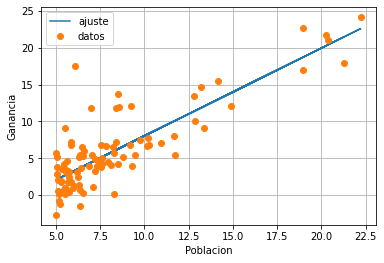

In [10]:
from matplotlib import pyplot as plt
plt.plot(x, y_estimado, label = 'ajuste')
plt.plot(x, y, 'o', label = 'datos')
plt.grid()
plt.legend()
plt.xlabel("Poblacion")
plt.ylabel("Ganancia")
plt.show()

In [10]:
#utilizando sickit learn --> te hace todas las cuentas 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regresion = linear_model.LinearRegression()
regresion.fit(x, y)
y_predicted = regresion.predict(x)
mse = mean_squared_error(y, y_predicted)
print("The mean sqared error is {}".format(mse))
print('The coefficients are {} '.format(regresion.coef_))

The mean sqared error is 4086560101.2056565
The coefficients are [[  139.21067402 -8738.01911233]] 


2. Estimo y(3,5)

In [12]:
x.shape

(97, 1)

Text(0.5, 0, 'cost')

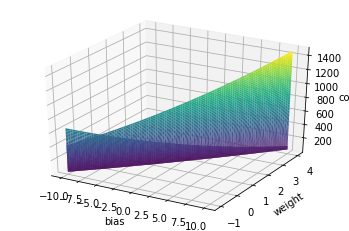

In [13]:
#grafico 3D
pts = 100
theta0_vals = np.linspace(-10, 10, pts)
theta1_vals = np.linspace(-1, 4, pts)
J_vals = np.zeros([pts,pts])
for i in range(pts):
    for j in range(pts):
      t = np.r_[theta1_vals[i], theta0_vals[j]]
      J_vals[i,j] = np.mean((np.dot(matriz_x,t)-dataset[:,1])**2)

ig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('bias')
ax.set_ylabel('weight')
ax.set_zlabel('cost')

In [14]:
x_a_estimar = np.array([3.5, 1])
print(x_a_estimar)
y_estimado_puntual = x_a_estimar.dot(w)
y_estimado_puntual  #valor predecido de y para una poblacion de 35000

[3.5 1. ]


array([0.27983688])

4) Resolver el problema con GD (repetir 1 y 2)

5) Plotear riesgo vs epochs

6) Chequear el LR óptimo

In [15]:
autovalores, autovectores = np.linalg.eig(matriz_xt.dot(matriz_x))
n = len(x)
lambda_max = max(autovalores)
lambda_min = min(autovalores)
alfa_max = n/lambda_max
l_r = n/(lambda_max + lambda_min)
l_r #learning rate optimo

0.01213534165664063

In [13]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.012),loss='MeanSquaredError')
hist = model.fit(x=x, y=y, batch_size = len(x), epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 269ms/step - loss: 41.5981
Epoch 2/100000
1/1 [==============================] - 0s 11ms/step - loss: 40.0077
Epoch 3/100000
1/1 [==============================] - 0s 12ms/step - loss: 38.4998
Epoch 4/100000
1/1 [==============================] - 0s 13ms/step - loss: 37.0700
Epoch 5/100000
1/1 [==============================] - 0s 9ms/step - loss: 35.7144
Epoch 6/100000
1/1 [==============================] - 0s 7ms/step - loss: 34.4289
Epoch 7/100000
1/1 [==============================] - 0s 6ms/step - loss: 33.2099
Epoch 8/100000
1/1 [==============================] - 0s 6ms/step - loss: 32.0540
Epoch 9/100000
1/1 [==============================] - 0s 6ms/step - loss: 30.9578
Epoch 10/100000
1/1 [==============================] - 0s 5ms/step - loss: 29.9181
Epoch 11/100000
1/1 [==============================] - 0s 5ms/step - loss: 28.9321
Epoch 12/100000
1/1 [==============================] - 0s 13ms/step - loss: 27.9970
Epoch 1

In [20]:
losses = np.array(hist.history['loss'])
param = model.get_weights()
prediction = model.predict(x)
epochs = 10000

In [19]:
best_mse = losses[-1]
print(f'El error cuadratico medio con el metodo del gradiente es {best_mse}')

El error cuadratico medio con el metodo del gradiente es 8.954126358032227


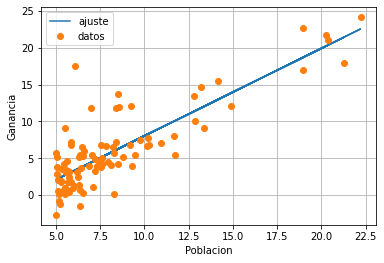

In [16]:
plt.plot(epochs, prediction, label = 'ajuste')
plt.plot(x, y, 'o', label = 'datos')
plt.grid()
plt.legend()
plt.xlabel("Poblacion")
plt.ylabel("Ganancia")
plt.show()

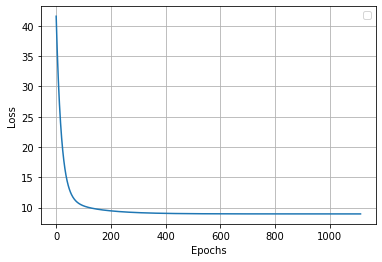

In [23]:
plt.plot(hist.history['loss'])
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Repetir para Inmobiliaria (excepto ploteos)

X: Superficie (sq-ft) y cantidad de habitaciones

y: Precio

(Predecir 1650 sq-ft y 3 habitaciones)

In [3]:
inmob_url = 'https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/inmobiliaria.txt'
f = request.urlopen(inmob_url)
inmobiliaria = np.loadtxt(f, dtype=float, delimiter=",")
inmobiliaria

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [4]:
x = np.delete(inmobiliaria, 2, 1)
y = np.delete(inmobiliaria, [0, 1], 1)
print(x.shape)
print(y.shape)

(47, 2)
(47, 1)


In [8]:
matriz_x = np.insert(x, x.shape[1], np.ones(47), axis = 1)  #matriz x 

w = calcular_w_estrella(matriz_x, y)
print(w)
y_estimado = matriz_x.dot(w)
mse = calcular_mse(y, y_estimado)
print(mse)


[[  139.21067402]
 [-8738.01911233]
 [89597.9095428 ]]
4086560101.205656


In [11]:
regresion = linear_model.LinearRegression()
regresion.fit(x, y)
y_predicted = regresion.predict(x)
mse = mean_squared_error(y, y_predicted)
print("The mean sqared error is {}".format(mse))
print('The coefficients are {} '.format(regresion.coef_))

The mean sqared error is 4086560101.2056565
The coefficients are [[  139.21067402 -8738.01911233]] 


In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
mean = x.mean(axis = 0)
desvio = x.std(axis = 0)

x_normalizado = (x - mean)/desvio

In [16]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss='MeanSquaredError')
hist = model.fit(x= x_normalizado, y=y, batch_size = len(x), epochs=100000,callbacks=[es])

Epoch 1/100000
1/1 [==============================] - 0s 255ms/step - loss: 131183214592.0000
Epoch 2/100000
1/1 [==============================] - 0s 9ms/step - loss: 7603451392.0000
Epoch 3/100000
1/1 [==============================] - 0s 14ms/step - loss: 5189327872.0000
Epoch 4/100000
1/1 [==============================] - 0s 16ms/step - loss: 4432348672.0000
Epoch 5/100000
1/1 [==============================] - 0s 10ms/step - loss: 4194986240.0000
Epoch 6/100000
1/1 [==============================] - 0s 5ms/step - loss: 4120558336.0000
Epoch 7/100000
1/1 [==============================] - 0s 5ms/step - loss: 4097220864.0000
Epoch 8/100000
1/1 [==============================] - 0s 5ms/step - loss: 4089903104.0000
Epoch 9/100000
1/1 [==============================] - 0s 5ms/step - loss: 4087608576.0000
Epoch 10/100000
1/1 [==============================] - 0s 5ms/step - loss: 4086889216.0000
Epoch 11/100000
1/1 [==============================] - 0s 5ms/step - loss: 4086663680.0000
E